In [29]:
!pip install google-colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import os
os.chdir('/content/drive/My Drive/UCF/BogenMaterials')
!ls


base_model_responses.json	    json_training_data	test.json
customer_queries.json		    parsed_data.csv	text_questions.json
final_predictions.csv		    parsed_data.gsheet	text-sections
fine_tuned3ep_model_responses.json  pdfs		train.json
fine_tuned_model_responses.json     runs		val.json


In [31]:
from huggingface_hub import notebook_login

# Login to Hugging Face
notebook_login()

In [32]:
!pip install -U pip
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1
!pip install transformers==4.41.2  # Or the closest available version
!pip install datasets==2.20.0 accelerate==0.31.0 bitsandbytes==0.43.1
!pip install peft==0.11.1 trl==0.9.4 colored==2.2.4


from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig
import json
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11

In [34]:
# #This is the model trained on one epoch
# MODEL_NAME = "josedellasala/Llama-3-8B-Instruct-E7000-Final-RAG"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# # Load tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

# model = AutoModelForCausalLM.from_pretrained(
#     MODEL_NAME,
#     quantization_config=quantization_config,
#     device_map="auto"
# )
# pipe = pipeline(
#     task="text-generation",
#     model=model,
#     tokenizer=tokenizer,
#     max_new_tokens=125,
#     return_full_text=False,
# )
#This is the model trained on three epochs
MODEL_NAME_3EP = "josedellasala/Llama-3-8B-Instruct-E7000-Final-3Epochs-RAG"


# Load tokenizer and model
tokenizer_3ep = AutoTokenizer.from_pretrained(MODEL_NAME_3EP, use_fast=True)

model3ep = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME_3EP,
    quantization_config=quantization_config,
    device_map="auto"
)
pipe3ep = pipeline(
    task="text-generation",
    model=model3ep,
    tokenizer=tokenizer_3ep,
    max_new_tokens=125,
    return_full_text=False,
)


# Step 2: Define model details
BASE_MODEL_NAME = "meta-llama/Meta-Llama-3-8B-Instruct"

# Load tokenizer and model
base_tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL_NAME, use_fast=True)

base_model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL_NAME,
    quantization_config=quantization_config,
    device_map="auto"
)
base_pipe = pipeline(
    task="text-generation",
    model=base_model,
    tokenizer=base_tokenizer,
    max_new_tokens=125,
    return_full_text=False,
)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/194 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

In [ ]:
import os
os.chdir('/content/drive/My Drive/UCF/BogenMaterials')
!ls

customer_queries.json	   json_training_data  pdfs	  text_questions.json  val.json
experiments_results9.json  parsed_data.csv     runs	  text-sections
final_predictions.csv	   parsed_data.gsheet  test.json  train.json


In [ ]:
import json
import random

# Load the questions dataset
with open("text_questions.json", "r") as file:
    questions = json.load(file)

def generate_prompt_and_answer(data_entry, pipeline):
    """
    Generates a prompt based on the question type and gets an answer
    from the LLM pipeline.
    """
    # Base prompt
    base_prompt = "Use your knowledge of Nyquist E7000 system to answer the following question briefly and with no explanation:\n\n"
    num_tokens = 5

    # Check the question type
    if data_entry["type"] == "multiple choice":
        prompt = (
            base_prompt +
            f"Question: {data_entry['question']}\n" +
            "Options:\n" +
            "\n".join(data_entry["answer_options"]) +
            "\nAnswer (choose only one option):"
        )
    elif data_entry["type"] == "multiple choice (select one or more)":
        prompt = (
            base_prompt +
            f"Question: {data_entry['question']}\n" +
            "Options:\n" +
            "\n".join(data_entry["answer_options"]) +
            "\nAnswer (choose more than one option, if applicable):"
        )
    elif data_entry["type"] == "completion":
        prompt = (
            base_prompt +
            f"Question: {data_entry['question']}\n" +
            "Provide a concise answer:"
        )
        num_tokens = 15
    else:
        raise ValueError(
            f"Unknown question type '{data_entry['type']}'. Allowed types are: "
            "'multiple choice', 'multiple choice (select one or more)', 'completion'."
        )

    # Generate a concise answer
    generated_answer = pipeline(
        prompt,
        max_new_tokens=num_tokens,
        temperature=0.2,
        top_p=0.9,
        return_full_text=False
    )[0]["generated_text"]

    return {
        "question": data_entry["question"],
        "generated_answer": generated_answer.strip(),
        "expected_answer": data_entry["answer"]
    }

# Run experiments and save results
results = {}

for experiment_id in range(1, 6):  # Perform 5 experiments
    sampled_questions = random.sample(questions, 20)  # Randomly select 20 questions
    FTresults = []
    FT3epresults = []
    BASEresults = []

    for entry in sampled_questions:
        try:
            FTresults.append(generate_prompt_and_answer(entry, pipe))  # Replace `pipe` with your fine-tuned model pipeline
            FT3epresults.append(generate_prompt_and_answer(entry, pipe3ep))
            BASEresults.append(generate_prompt_and_answer(entry, base_pipe))  # Replace `base_pipe` with your base model pipeline
        except ValueError as e:
            print(f"Error processing question {entry.get('question_number', 'unknown')}: {str(e)}")

    # Save the results for this experiment
    results[f"Experiment_{experiment_id}"] = {
        "FTresults": FTresults,
        "FT3epresults": FT3epresults,
        "BASEresults": BASEresults
    }

# Save all experiments to a single JSON file
with open("experiments_results0.json", "w") as outfile:
    json.dump(results, outfile, indent=4)

print("All experiments completed and results saved.")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

All experiments completed and results saved.


In [3]:
import json
from openai import OpenAI

# Load the experiments results JSON file
file_path = 'experiments_results1.json'  # Replace with the actual file path
with open(file_path, 'r') as file:
    experiments = json.load(file)

# Set your OpenAI API key
client = OpenAI(api_key="")

# Function to grade an answer using GPT-4
def chat_gpt(prompt):
    try:
        response = client.chat.completions.create(
            model="gpt-4",  # Update with the correct model name
            messages=[{"role": "user", "content": prompt}]
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error grading answer: {e}")
        return "0"

# Function to construct the prompt and grade the answer
def grade_answer(generated, expected):
    prompt = f"""
    Given the following:
    Generated Answer: {generated}
    Expected Answer: {expected}

    Grade the answer: Return only '1' if the generated answer matches the expected answer, otherwise return '0'.
    Instructions: if the generated answer contains the correct letter, count it as a good score.
    For example:

        "question": "What is the TFTP Server IP address in the Appliance Network Setup?",
        "generated_answer": "b. The IP address",
        "expected_answer": "b. The IP address of the Nyquist System Controller or Server"
        is Correct because both answers are b.
    """
    response = chat_gpt(prompt)
    # Clean and ensure the response is a valid integer
    response = response.replace("'", "").strip()  # Remove quotes if present
    try:
        return int(response)  # Convert the response to an integer
    except ValueError:
        print(f"Unexpected response from GPT: {response}")
        return 0  # Default to 0 for invalid responses

# Iterate through each experiment and grade answers for both LLMs
ft_total_score = 0
ft3ep_total_score = 0
base_total_score = 0
num_experiments = len(experiments)

for experiment_id, results in experiments.items():
    print(f"Processing {experiment_id}...")

    # Skip "Final_Averages" or any other non-experiment entry
    if experiment_id == "Final_Averages":
        continue

    # Initialize counters for this experiment
    ft_correct_answers = 0
    ft3ep_correct_answers = 0
    base_correct_answers = 0
    num_questions = len(results["FTresults"])

    # Grade Fine-Tuned model results
    for item in results["FTresults"]:
        generated_answer = item['generated_answer']
        expected_answer = item['expected_answer']
        ft_correct_answers += grade_answer(generated_answer, expected_answer)

    # Grade 3 Epoch Fine tuned model results
    for item in results["FT3epresults"]:
        generated_answer = item['generated_answer']
        expected_answer = item['expected_answer']
        ft3ep_correct_answers += grade_answer(generated_answer, expected_answer)

    # Grade Base model results
    for item in results["BASEresults"]:
        generated_answer = item['generated_answer']
        expected_answer = item['expected_answer']
        base_correct_answers += grade_answer(generated_answer, expected_answer)

    # Update total scores
    ft_total_score += ft_correct_answers / num_questions  # Average for this experiment
    ft3ep_total_score += ft3ep_correct_answers / num_questions  # Average for this experiment
    base_total_score += base_correct_answers / num_questions  # Average for this experiment

# Compute the final average scores across all experiments
ft_average_score = ft_total_score / num_experiments
ft3ep_average_score = ft3ep_total_score / num_experiments
base_average_score = base_total_score / num_experiments

# Add the final average grades to the dictionary
experiments["Final_Averages"] = {
    "Fine_Tuned_Model": ft_average_score,
    "Fine_Tuned_3Epochs_Model": ft3ep_average_score,
    "Base_Model": base_average_score
}

# Save the updated experiments back to the file
with open(file_path, "w") as outfile:
    json.dump(experiments, outfile, indent=4)

# Display results
print(f"Fine-Tuned Model Average Score: {ft_average_score:.2f}")
print(f"Fine-Tuned Model to 3 epochs Average Score: {ft3ep_average_score:.2f}")
print(f"Base Model Average Score: {base_average_score:.2f}")


Processing Experiment_1...
Processing Experiment_2...
Unexpected response from GPT: Generated Answer: ok
Grade the answer: 1
Processing Experiment_3...
Unexpected response from GPT: Given Answer: 0
Processing Experiment_4...
Processing Experiment_5...
Fine-Tuned Model Average Score: 0.56
Fine-Tuned Model to 3 epochs Average Score: 0.59
Base Model Average Score: 0.58


In [37]:
import json
from transformers import pipeline

# Load customer queries
with open("customer_queries.json", "r") as file:
    customer_queries = json.load(file)

# Function to generate a troubleshooting prompt
def generate_troubleshooter_prompt(query):
    return (
        "You are a customer service representative expert in the Bogen E7000 system.\n"
        "Your task is to provide a possible explanation for the issue described below and suggest a possible fix.\n\n"
        f"Customer Query: {query}\n\n"
        "Explanation and Fix:"
    )

# Function to generate a training prompt
def generate_training_prompt(query):
    return (
        "You are a knowledgeable customer service representative specializing in the Bogen E7000 system. "
        "Your task is to provide clear, concise, and helpful answers to customer training queries, "
        "offering step-by-step instructions or guidance as needed.\n\n"
        f"Customer Query: {query}\n\n"
        "Response:\n"
        "- Provide a detailed explanation relevant to the query.\n"
        "- Include step-by-step instructions, if applicable.\n"
        "- Mention any key features or tips related to the query.\n"
        "- Avoid unnecessary information, and ensure clarity and precision.\n"
        "Answer:"
    )

# Function to generate prompt based on query type
def generate_prompt(query, query_type):
    if query_type == "SystemIssues":
        return generate_troubleshooter_prompt(query)
    elif query_type == "SystemQuestions":
        return generate_training_prompt(query)
    else:
        raise ValueError(f"Unknown query type: {query_type}")

# Generate answers using both models
fine_tuned3ep_responses = []
base_model_responses = []

for query in customer_queries:
    prompt = generate_prompt(query["query"], query["type"])

    # Get responses from both models
    fine_tuned3ep_answer = pipe3ep(prompt, max_new_tokens=125)[0]["generated_text"].strip()
    base_model_answer = base_pipe(prompt, max_new_tokens=125)[0]["generated_text"].strip()

    # Append results
    fine_tuned3ep_responses.append({
        "id": query["id"],
        "query": query["query"],
        "type": query["type"],
        "response": fine_tuned3ep_answer
    })

    base_model_responses.append({
        "id": query["id"],
        "query": query["query"],
        "type": query["type"],
        "response": base_model_answer
    })

# Save results to JSON files
with open("fine_tuned3ep_model_responses.json", "w") as fine_tuned3ep_file:
    json.dump(fine_tuned3ep_responses, fine_tuned3ep_file, indent=4)

with open("base_model_responses.json", "w") as base_model_file:
    json.dump(base_model_responses, base_model_file, indent=4)

print("Responses saved.")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Responses saved.


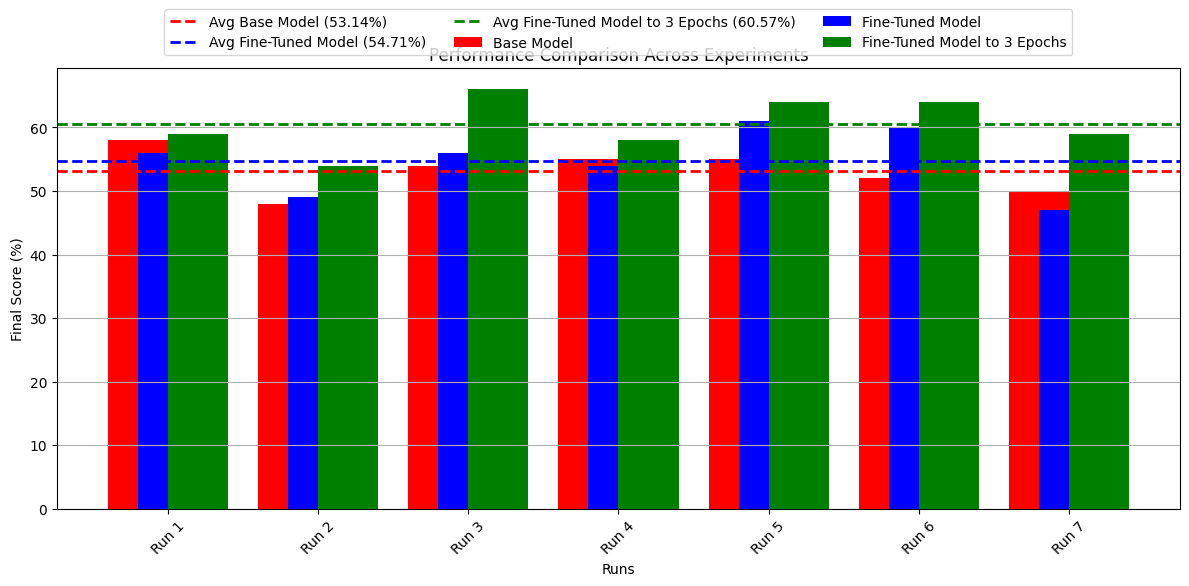

In [28]:
import json
import matplotlib.pyplot as plt
import glob
import os

# Change directory to where experiment files are stored
os.chdir('/content/drive/My Drive/UCF/BogenMaterials/runs/run2')

# Glob to find all files with the naming pattern
file_pattern = 'experiments_results*.json'
experiment_files = glob.glob(file_pattern)

# Check if files were found
if not experiment_files:
    raise FileNotFoundError(f"No files matching pattern '{file_pattern}' were found in the current directory.")

# Initialize lists to store final averages
ft_final_averages = []
ft3ep_final_averages = []
base_final_averages = []

# Process each file
for file_path in experiment_files:
    with open(file_path, 'r') as file:
        experiments = json.load(file)

    # Extract Final_Averages section
    if "Final_Averages" in experiments:
        ft_final_averages.append(experiments["Final_Averages"]["Fine_Tuned_Model"] * 100)  # Convert to percentage
        ft3ep_final_averages.append(experiments["Final_Averages"]["Fine_Tuned_3Epochs_Model"] * 100)  # Convert to percentage
        base_final_averages.append(experiments["Final_Averages"]["Base_Model"] * 100)  # Convert to percentage

# Ensure data exists
if not ft_final_averages or not base_final_averages:
    raise ValueError("No final averages were collected. Check the input files for valid data.")

# Calculate average performance for each model
avg_base = sum(base_final_averages) / len(base_final_averages)
avg_ft = sum(ft_final_averages) / len(ft_final_averages)
avg_ft3ep = sum(ft3ep_final_averages) / len(ft3ep_final_averages)

# Create a bar plot for Final Averages
plt.figure(figsize=(12, 6))
x = range(len(ft_final_averages))  # X positions for bars

# Bar Plot
plt.bar([i - 0.2 for i in x], base_final_averages, width=0.4, label="Base Model", color="red")  # Red for base
plt.bar([i for i in x], ft_final_averages, width=0.4, label="Fine-Tuned Model", color="blue")  # Blue for fine-tuned
plt.bar([i + 0.2 for i in x], ft3ep_final_averages, width=0.4, label="Fine-Tuned Model to 3 Epochs", color="green")  # Green for 3 epochs

# Add horizontal lines for average performances
plt.axhline(y=avg_base, color='red', linestyle='--', linewidth=2, label=f"Avg Base Model ({avg_base:.2f}%)")
plt.axhline(y=avg_ft, color='blue', linestyle='--', linewidth=2, label=f"Avg Fine-Tuned Model ({avg_ft:.2f}%)")
plt.axhline(y=avg_ft3ep, color='green', linestyle='--', linewidth=2, label=f"Avg Fine-Tuned Model to 3 Epochs ({avg_ft3ep:.2f}%)")

# Formatting
plt.xticks(x, [f"Run {i+1}" for i in x], rotation=45)
plt.title("Performance Comparison Across Experiments")
plt.xlabel("Runs")
plt.ylabel("Final Score (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)  # Move legend to the top, outside the plot
plt.grid(axis="y")
plt.tight_layout()
plt.show()


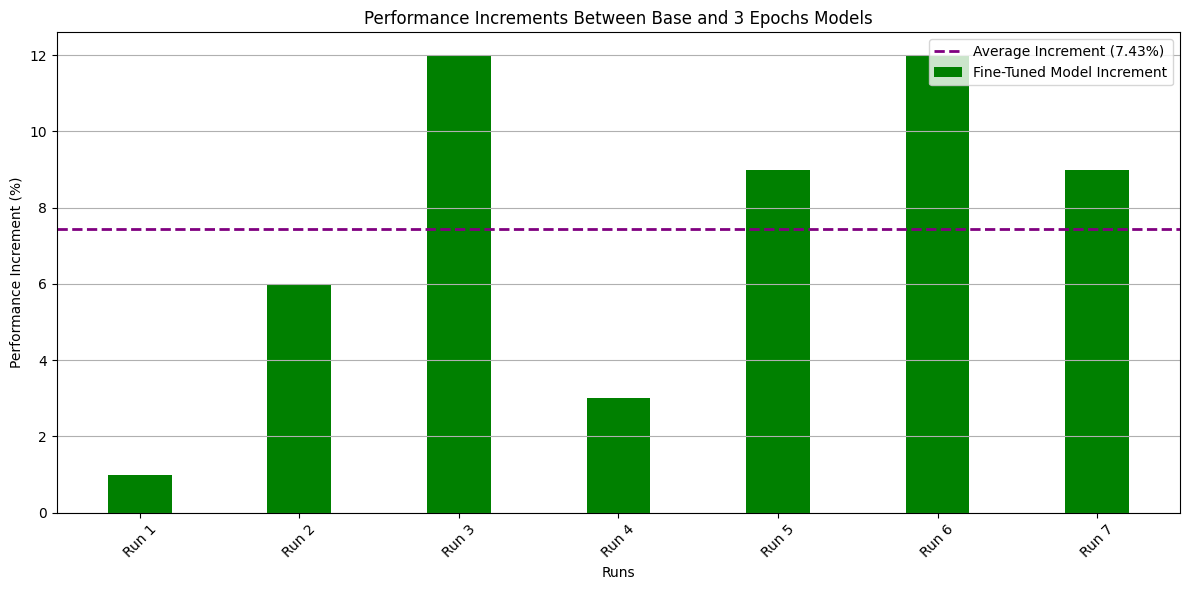

In [27]:
import json
import matplotlib.pyplot as plt
import glob
import os

# Change directory to where experiment files are stored
os.chdir('/content/drive/My Drive/UCF/BogenMaterials/runs/run2')

# Glob to find all files with the naming pattern
file_pattern = 'experiments_results*.json'
experiment_files = glob.glob(file_pattern)

# Check if files were found
if not experiment_files:
    raise FileNotFoundError(f"No files matching pattern '{file_pattern}' were found in the current directory.")

# Initialize lists to store final averages
ft_final_averages = []
ft3ep_final_averages = []
base_final_averages = []

# Process each file
for file_path in experiment_files:
    with open(file_path, 'r') as file:
        experiments = json.load(file)

    # Extract Final_Averages section
    if "Final_Averages" in experiments:
        ft_final_averages.append(experiments["Final_Averages"]["Fine_Tuned_Model"] * 100)  # Convert to percentage
        ft3ep_final_averages.append(experiments["Final_Averages"]["Fine_Tuned_3Epochs_Model"] * 100)  # Convert to percentage
        base_final_averages.append(experiments["Final_Averages"]["Base_Model"] * 100)  # Convert to percentage

# Ensure data exists
if not ft_final_averages or not base_final_averages:
    raise ValueError("No final averages were collected. Check the input files for valid data.")

# Calculate performance increments
ft_increment = [ft3ep - base for ft3ep, base in zip(ft3ep_final_averages, base_final_averages)]

# Calculate the average increment
average_increment = sum(ft_increment) / len(ft_increment)

# Plot increments
plt.figure(figsize=(12, 6))
x = range(len(ft_increment))  # X positions for bars

# Bar Plot for increments
plt.bar([i for i in x], ft_increment, width=0.4, label="Fine-Tuned Model Increment", color="green")

# Add a horizontal line for the average increment
plt.axhline(y=average_increment, color='purple', linestyle='--', linewidth=2, label=f"Average Increment ({average_increment:.2f}%)")

# Formatting
plt.xticks(x, [f"Run {i+1}" for i in x], rotation=45)
plt.title("Performance Increments Between Base and 3 Epochs Models")
plt.xlabel("Runs")
plt.ylabel("Performance Increment (%)")
plt.legend(loc='upper right')
plt.grid(axis="y")
plt.tight_layout()
plt.show()
